In [1]:
import pandas as pd

In [2]:
pd.__version__


'0.23.0'

In [6]:
metadata=pd.read_csv("D:/Data Science/POC/Topic Modelling/Hotel Reviews/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv", engine='python')

In [7]:
metadata.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [8]:
metadata['Negative_Review'].head(5)

0     I am so angry that i made this post available...
1                                          No Negative
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
Name: Negative_Review, dtype: object

In [9]:
metadata['Negative_Review'] = metadata['Negative_Review'].fillna('')

In [10]:
metadata['Negative_Review'].head(10)

0     I am so angry that i made this post available...
1                                          No Negative
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
5     Backyard of the hotel is total mess shouldn t...
6     Cleaner did not change our sheet and duvet ev...
7     Apart from the price for the brekfast Everyth...
8     Even though the pictures show very clean room...
9     The aircondition makes so much noise and its ...
Name: Negative_Review, dtype: object

In [11]:
No_of_seleced_doc=3000

In [12]:
df1=metadata['Negative_Review'].iloc[0:No_of_seleced_doc]

In [13]:
df1.head(20)

0      I am so angry that i made this post available...
1                                           No Negative
2      Rooms are nice but for elderly a bit difficul...
3      My room was dirty and I was afraid to walk ba...
4      You When I booked with your company on line y...
5      Backyard of the hotel is total mess shouldn t...
6      Cleaner did not change our sheet and duvet ev...
7      Apart from the price for the brekfast Everyth...
8      Even though the pictures show very clean room...
9      The aircondition makes so much noise and its ...
10                                   Nothing all great 
11     6 30 AM started big noise workers loading woo...
12     The floor in my room was filfy dirty Very bas...
13                                          No Negative
14     The staff in the restaurant could of been mor...
15                                          No Negative
16     Very steep steps in room up to the bed not sa...
17     We did not like the fact that breakfast w

In [14]:
df1.shape


(3000,)

In [15]:
print("There are {} review comment from {} different nationality, such as {}... \n".format(df1.shape[0],len(metadata.Reviewer_Nationality.unique()),", ".join(metadata.Reviewer_Nationality.unique()[0:5])))

There are 3000 review comment from 227 different nationality, such as  Russia ,  Ireland ,  Australia ,  United Kingdom ,  New Zealand ... 



In [16]:
Nationality=metadata[["Reviewer_Score","Reviewer_Nationality","Negative_Review"]].iloc[0:No_of_seleced_doc].groupby("Reviewer_Nationality")

In [17]:
Nationality.describe().head(10)

Reviewer_Score                                        \
                              count      mean       std  min    25%   50%   
Reviewer_Nationality                                                        
                                1.0  7.900000       NaN  7.9  7.900  7.90   
 Abkhazia Georgia               2.0  5.650000  2.616295  3.8  4.725  5.65   
 Albania                        2.0  5.600000  1.555635  4.5  5.050  5.60   
 Argentina                      4.0  8.975000  1.102648  7.5  8.475  9.20   
 Australia                    132.0  8.275758  1.766530  2.9  7.100  8.80   
 Austria                       12.0  8.241667  1.352075  5.4  7.400  8.55   
 Azerbaijan                     1.0  7.500000       NaN  7.5  7.500  7.50   
 Bahrain                        7.0  7.985714  1.754450  4.2  8.100  8.30   
 Belarus                        1.0  7.900000       NaN  7.9  7.900  7.90   
 Belgium                       26.0  8.376923  1.840936  3.8  6.800  9.20   

                                    
                         75%   max  
Reviewer_Nationality                
                       7.900   7.9  
 Abkhazia Georgia      6.575   7.5  
 Albania               6.150   6.7  
 Argentina             9.700  10.0  
 Australia            10.000  10.0  
 Austria               9.300  10.0  
 Azerbaijan            7.500   7.5  
 Bahrain               8.800   9.6  
 Belarus               7.900   7.9  
 Belgium               9.900  10.0

In [18]:
Nationality.mean().sort_values(by="Reviewer_Score",ascending=False).head(10)

,Reviewer_Score
Reviewer_Nationality,
Uruguay,10.000000
Liechtenstein,10.000000
United States Minor Outlying Islands,10.000000
Panama,10.000000
Morocco,10.000000
Slovakia,9.733333
Namibia,9.600000
Latvia,9.600000
Indonesia,9.600000


In [19]:
import matplotlib.pyplot as plt
% matplotlib inline

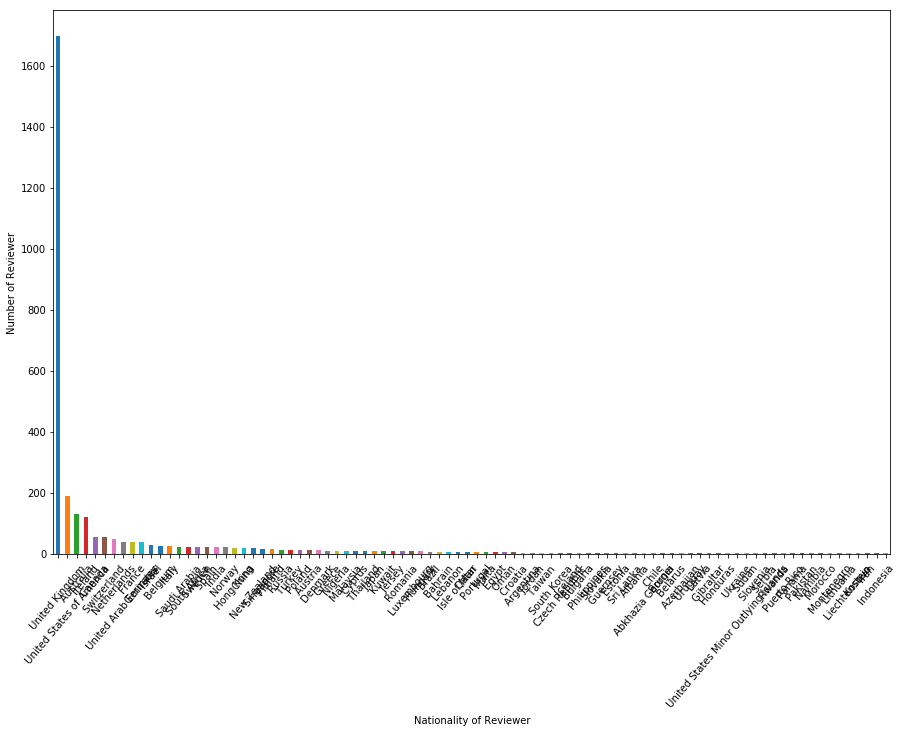

In [20]:
plt.figure(figsize=(15,10))
Nationality.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Nationality of Reviewer")
plt.ylabel("Number of Reviewer")
plt.show()

In [22]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [23]:
text = " ".join(review for review in metadata['Negative_Review'])
print ("There are {} words in the combination of all review.".format(len(text)))


There are 48891016 words in the combination of all review.


In [24]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Nan","Negative","etc"])

In [25]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)

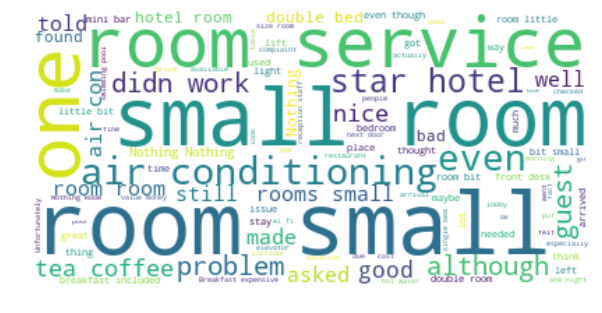

In [26]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import os
!pip install gensim
import gensim